
Entrega #1 - Algoritmos genéticos

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: May 19, 2023



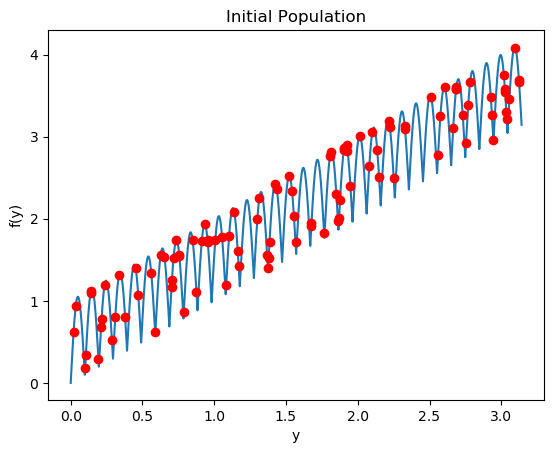

Best chromossome (binary): 01010010110111000110001000000010
Best chromossome (float): 3.0973687171936035
Best chromossome fitness score: 4.085282736311758


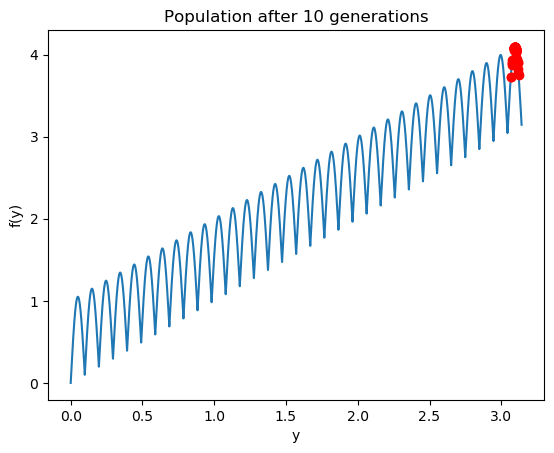

Best chromossome (binary): 00101100000110000110001000000010
Best chromossome (float): 3.0952272415161133
Best chromossome fitness score: 4.09143616078587


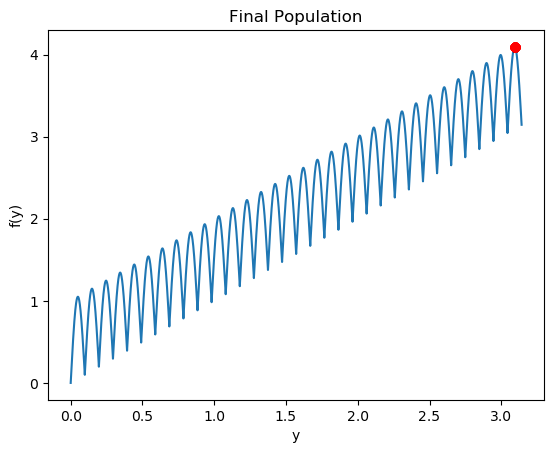

Best chromossome (binary): 00000000000010000110001000000010
Best chromossome (float): 3.0947265625
Best chromossome fitness score: 4.092201342445265


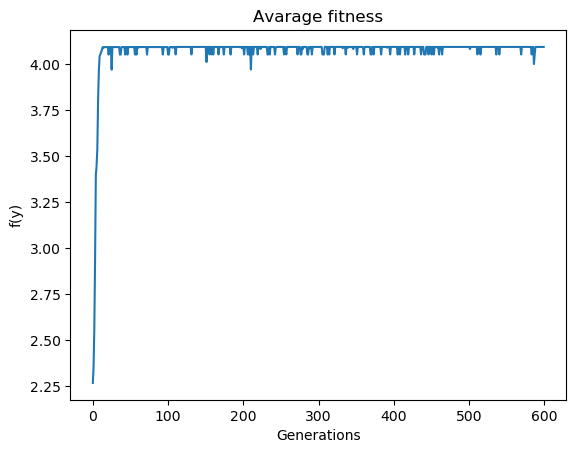

Avarage Fitness: 4.092208897362676


In [12]:
#!/usr/bin/env python

"""
Entrega #1 - Algoritmos genéticos

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: May 19, 2023
"""

import struct
import numpy
from matplotlib import pyplot as plt

L = 4 * 8 # size of chromossome in bits
n = 100 # size of population
pm = 0.0035 # mutation probability
pc = 0.4 # crossover probability
num_generations = 600 # number of generations

def floatToBits(f):
    s = struct.pack('>f', f)
    return struct.unpack('>L', s)[0]

def bitsToFloat(b):
    s = struct.pack('>L', b)
    return struct.unpack('>f', s)[0]

# Exemplo : 1.23 -> '00010111100 '
def get_bits(x):
    x = floatToBits(x)
    N = 4 * 8
    bits = ''
    for bit in range(N):
        b = x & (2** bit)
        bits += '1' if b > 0 else '0'
    return bits

# Exemplo : '00010111100 ' -> 1.23
def get_float(bits):
    x = 0
    assert (len(bits) == L)
    for i, bit in enumerate (bits):
        bit = int(bit) # 0 or 1
        x += bit * (2** i)
    return bitsToFloat (x)

# Function to be maximized (fitness function)
def fitness_function(y):
    result = y + numpy.abs(numpy.sin(32*y))
    return result

# This function generates the first set of chromosomes
def generate_initial_population():
    population = []
    for i in range(n):
        population.append(get_bits(numpy.random.uniform(0,numpy.pi)))
    return population

# Calculates the fitness of each chromosome
def fitness(population):
    fitness_score = []
    for bits in population:
        y = get_float(bits)
        if 0 <= y < numpy.pi:
            fitness_score.append(fitness_function(y))
        else:
            fitness_score.append(0)
    return fitness_score

# Tournament selection (size = 2)
def selection(population, fitness_score):
    fitness_score_copy = fitness_score.copy()
    population_copy = population.copy()
    selected_chomossomes = []
    for _ in range(2):
        choices = numpy.random.choice(len(fitness_score_copy),2, False)
        if fitness_score_copy[choices[0]] > fitness_score_copy[choices[1]]:
            selected_chomossomes.append(population_copy[choices[0]])
            fitness_score_copy.pop(choices[0])
            population_copy.pop(choices[0])
        else:
            selected_chomossomes.append(population_copy[choices[1]])
            fitness_score_copy.pop(choices[1])
            population_copy.pop(choices[1])
    return selected_chomossomes

# Uniform crossover
def crossover(selected_chomossomes):
    offspring = []
    mask = numpy.random.choice([True, False], size=L)
    first_chromossome = list(selected_chomossomes[0])
    second_chromossome = list(selected_chomossomes[1])
    if numpy.random.choice([True, False], size=1, p=[pc,1-pc]):
        for i, change_bit in enumerate(mask):
            if change_bit:
               first_chromossome[i] = selected_chomossomes[1][i]
               second_chromossome[i] = selected_chomossomes[0][i]
        offspring.extend([''.join(first_chromossome),''.join(second_chromossome)])
    else:
        offspring.extend([''.join(first_chromossome),''.join(second_chromossome)])
    return offspring

# Apply the mutation
def mutation(offspring):
    offspring_mutated = []
    for chromossome in offspring:
        list_chromossome = list(chromossome)
        if numpy.random.choice([True, False], size=1, p=[pm,1-pm]):
            bit_to_change = numpy.random.randint(L)
            if list_chromossome[bit_to_change] == '0':
                list_chromossome[bit_to_change] = '1'
                offspring_mutated.append(''.join(list_chromossome))
            else:
                list_chromossome[bit_to_change] = '0'
                offspring_mutated.append(''.join(list_chromossome))
        else:
            offspring_mutated.append(''.join(list_chromossome))  
    return offspring_mutated

# Perform the genetic alforithm
def genetic_algorithm(num_generations):
    new_population = []
    avarage_fitness = []
    population = generate_initial_population()
    fitness_score = fitness(population)
    plot_population(population,fitness_score, "Initial Population")
    for gen in range(num_generations):
        for _ in range(int(n/2)):
            selected_chomossomes = selection(population, fitness_score)
            offspring = crossover(selected_chomossomes)
            offspring_mutated = mutation(offspring)
            new_population.extend(offspring_mutated)
        population = new_population.copy()
        new_population.clear()
        fitness_score = fitness(population)
        avarage_fitness.append(numpy.average(fitness_score))
        if gen == 10:
            plot_population(population,fitness_score, "Population after 10 generations")
    plot_population(population,fitness_score, "Final Population")
    plot_avarage_fitness(avarage_fitness)

# Creates a graph of the population over the function
def plot_population(population, fitness_score, title):
    y = numpy.arange(0,numpy.pi, 0.0001) 
    fy = y + numpy.abs(numpy.sin(32*y)) 
    plt.title(title) 
    plt.xlabel("y") 
    plt.ylabel("f(y)") 
    plt.plot(y,fy) 
    data = []
    for bits in population:
        data.append(get_float(bits))
    plt.plot(data,fitness_score,'ro')
    plt.show()
    print("Best chromossome (binary): "+ str(get_bits(data[fitness_score.index(max(fitness_score))])))
    print("Best chromossome (float): " + str(data[fitness_score.index(max(fitness_score))]))
    print("Best chromossome fitness score: " + str(max(fitness_score))) 
    

# Creates a graph of average fitness for each generation
def plot_avarage_fitness(avarage_fitness):
    generations = numpy.arange(0, num_generations)
    plt.title("Avarage fitness") 
    plt.ylabel("f(y)") 
    plt.xlabel("Generations") 
    plt.plot(generations,avarage_fitness)
    plt.show()
    print("Avarage Fitness: " + str(max(avarage_fitness)))

print(__doc__)
genetic_algorithm(num_generations)